   # Baccanel buffet customer opinions analysis

### We will analyze Bacchanal buffet customer opinions and create a Wordcloud of those who gave 1 and 5 stars. and we will apply the classification model

<img src=https://www.caesars.com/content/dam/empire/clv/restaurants/bacchanal-buffet/1920x1080/bacchanal-clv-meatstation-1920x1080.jpg.transform/featured-img/image.jpg width='600'>

In [1]:
#pip install nltk

In [2]:
import pandas as pd
import nltk

In [3]:
df=pd.read_csv("restaurant.csv", encoding='latin-1')  #does not accept non-English speakers

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df.shape

(10417, 10)

In [6]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex= True)
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','', regex = True)
df['text']=df['text'].str.replace('\r','', regex = True)

In [7]:
import seaborn as sns

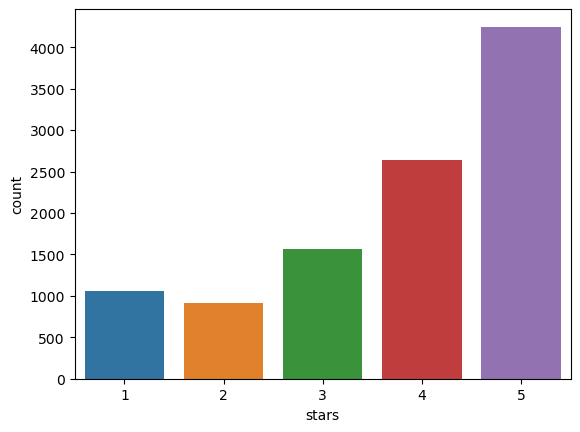

In [8]:
sns.countplot(x=df['stars']);

In [9]:
yelpbw=df[(df.stars==1)|(df.stars==5)]

In [10]:
yelpbw.reset_index(drop=True,inplace=True)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [12]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [13]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [14]:
x=yelpbw["text"]
y=yelpbw["stars"]

In [15]:
x=vect.fit_transform(x)

/Users/salihbekdemir/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/Users/salihbekdemir/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
l=LogisticRegression()

In [20]:
l.fit(x_train,y_train)

/Users/salihbekdemir/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
pred=l.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(pred,y_test)

0.9604147031102733

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
d=DecisionTreeClassifier()

In [26]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
pred=d.predict(x_test)

In [28]:
accuracy_score(pred,y_test)

0.8680490103675778

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
nb=MultinomialNB()

In [31]:
model=nb.fit(x_train,y_train)

In [32]:
tahmin=model.predict(x_test)

In [33]:
accuracy_score(tahmin,y_test)

0.9330819981149858

In [34]:
pred

array([5, 5, 5, ..., 5, 5, 5])

In [35]:
# We reached 96.04% with logistic regression

## Sentiment analysis

In [36]:
yelpbw=df[(df.stars==1)|(df.stars==5)]

In [37]:
df[df.stars==1] # We only see comments with one star

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
12,2371349,7aYfSp52nU6UbZbeRZ2c-g,ic-tyi1jElL_umxZVh8KNA,RESDUcs7fIiihp38-d6_6g,1,0,0,0,food is fine better than most buffets when i r...,2015-07-16 07:53:22
33,2372856,nK4OlgQ11QMZ_pMgeE9BzA,QPKF4JnGJrYKnC9gzwEc-w,RESDUcs7fIiihp38-d6_6g,1,0,0,0,be careful using the restroom here while i was...,2017-10-24 19:57:44
45,2373128,qFkvCcTNWcQdLH6ORXIqVQ,qr06IGEdVEIQmyv-NZe-og,RESDUcs7fIiihp38-d6_6g,1,3,0,0,this buffet can be summarized in words quanti...,2017-09-09 00:36:35
50,2373371,unLD4_m1PgtqBA1YRcp4Dw,x7Uhf587a2Mp6biY8CttpQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,this place used to be the best buffet i ever h...,2015-02-16 08:13:39
...,...,...,...,...,...,...,...,...,...,...
10367,3215644,u3vSoPgFzsmS6o1TpHntCQ,b40IB7VrUOU2HxUIxp7eHg,RESDUcs7fIiihp38-d6_6g,1,0,0,0,we are locals in vegas and we never hesitate t...,2019-12-01 21:35:51
10377,3216328,zOct2Aq30MLfU17BsWLN4g,H9GSPcxChDaNhUmLo5R1uQ,RESDUcs7fIiihp38-d6_6g,1,1,1,0,if you want to wait multiple hours for horribl...,2019-12-01 19:30:56
10390,3218131,Pxsbi9SQJ88tkTYC7PMZBw,2kK-moaKz0LXhj-ouoXvCQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,i have eaten here for the breakfast and lunch...,2019-12-11 21:10:54
10394,3218578,BlQVXfNOt9v0qPBFK7lzHA,_8EjO0bnfAxIGONC7UxccA,RESDUcs7fIiihp38-d6_6g,1,0,0,0,in thanksgiving day i stayed in line for three...,2019-11-30 05:30:27


In [38]:
TextBlob(df['text'][0]).sentiment # to see the first comment

Sentiment(polarity=0.3373304473304473, subjectivity=0.5869264069264069)

## Wordcloud

In [39]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [40]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('tabaksilhouette.jpeg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [41]:
import matplotlib.pyplot as plt

In [42]:
iyi=df[df['stars']==5]['text']

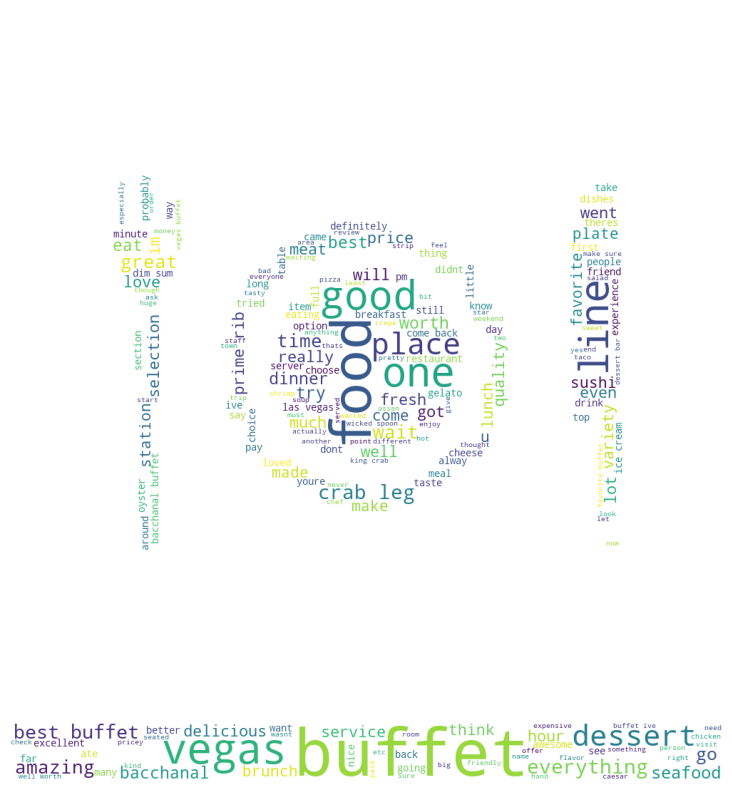

In [43]:
wc(iyi,'white')

In [44]:
kötü=df[df['stars']==1]['text']

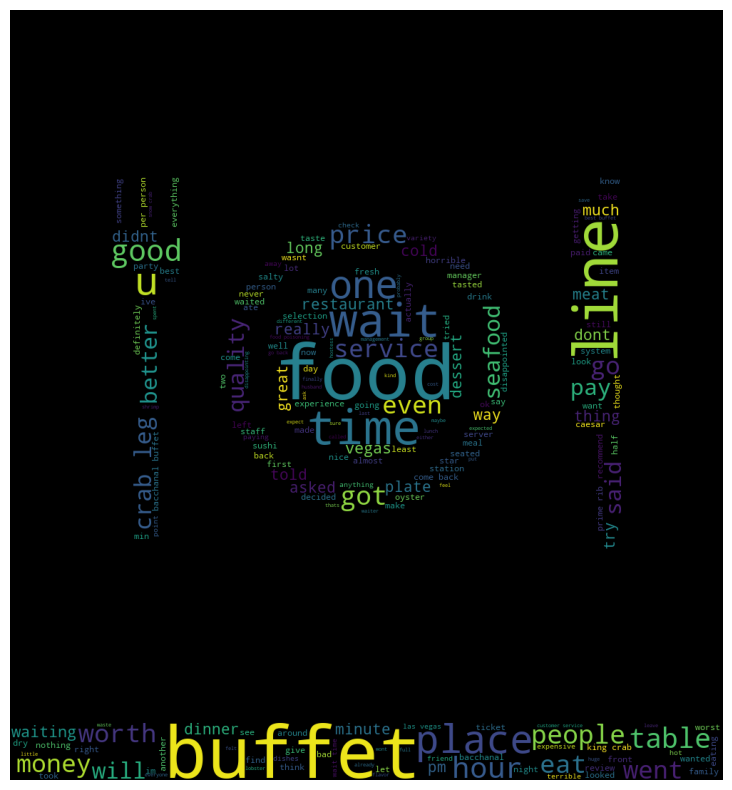

In [45]:
wc(kötü,'black')

## With this data, Baccanel buffet can see what customers complain about and learn what it needs to fix in the future